# Predicting Concrete Strength

## Introduction
The purpose of this project to is create a machine learning model that is able to predict the compressive strength of concrete. Various models will be constructed and the performance will be evaluated using the mean absolute error (MAE) and the root mean squared error (RMSE)

Concrete is an essential material in construction, supporting the growth of cities, transportation systems, and architectural wonders. Its history is a testament to human innovation and engineering prowess. The history of concrete dates back thousands of years, and its development has played a crucial role in shaping civilizations and modern construction practices. Concrete is an incredibly versatile construction material with a wide range of uses across various industries. Its durability, strength, and adaptability make it an essential component in modern infrastructure and architecture.

Concrete compression strength refers to the ability of concrete to withstand a compressive load without failing or collapsing. It is a critical property of concrete and is often used as a measure of its overall quality and structural performance. The compression strength of concrete is usually expressed in units of force per unit area, such as pounds per square inch (psi) or megapascals (MPa).


## The Data
The [dataset](https://www.kaggle.com/datasets/maajdl/yeh-concret-data) used for this project was downloaded from kaggle. 

**Attribute Information:**  
Cement, Slag, Fly Ash, Water, Superplasitizer, Coarse Aggregate, and Fine Aggregate are all components of concrete. 
- Cement (kg in a m3 mixture) -- Feature Attribute
- Blast Furnace Slag (kg in a m3 mixture) -- Feature Attribute
- Fly Ash (kg in a m3 mixture) -- Feature Attribute
- Water (kg in a m3 mixture) -- Feature Attribute
- Superplasticizer (kg in a m3 mixture) -- Feature Attribute
- Coarse Aggregate (kg in a m3 mixture) -- Feature Attribute
- Fine Aggregate (kg in a m3 mixture) -- Feature Attribute
- Age (1 - 365 days) -- Feature Attribute
- Concrete compressive strength (MPa) -- Target Variable


## Commom Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)             





# Read in the Data and Initial Exploration

In [2]:
concrete = pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
print(concrete.shape)
concrete.info()
concrete.head()

(1030, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# EDA

## Descriptive Statistics

#### Rename columns
Some of the column names are too long

In [4]:
# rename columns
concrete = concrete.rename({'coarseaggregate': 'coarse_agg', 'fineaggregate':'fine_agg', 'superplasticizer':'sup_plast',
                              'csMPa':'comp_strength'}, axis=1)

In [5]:
concrete.describe()

,cement,slag,flyash,water,sup_plast,coarse_agg,fine_agg,age,comp_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete.isna().sum()

cement           0
slag             0
flyash           0
water            0
sup_plast        0
coarse_agg       0
fine_agg         0
age              0
comp_strength    0
dtype: int64

## Histograms
- The slag, flyash and sup_plast distributions exhibit skewness because of the presence of zero values. These zero values align with concrete practices since slag, fly ash, and superplasticizers are not added to the mixture as a combined of the three components but rather individually.

Saving figure attribute_histogram_plots


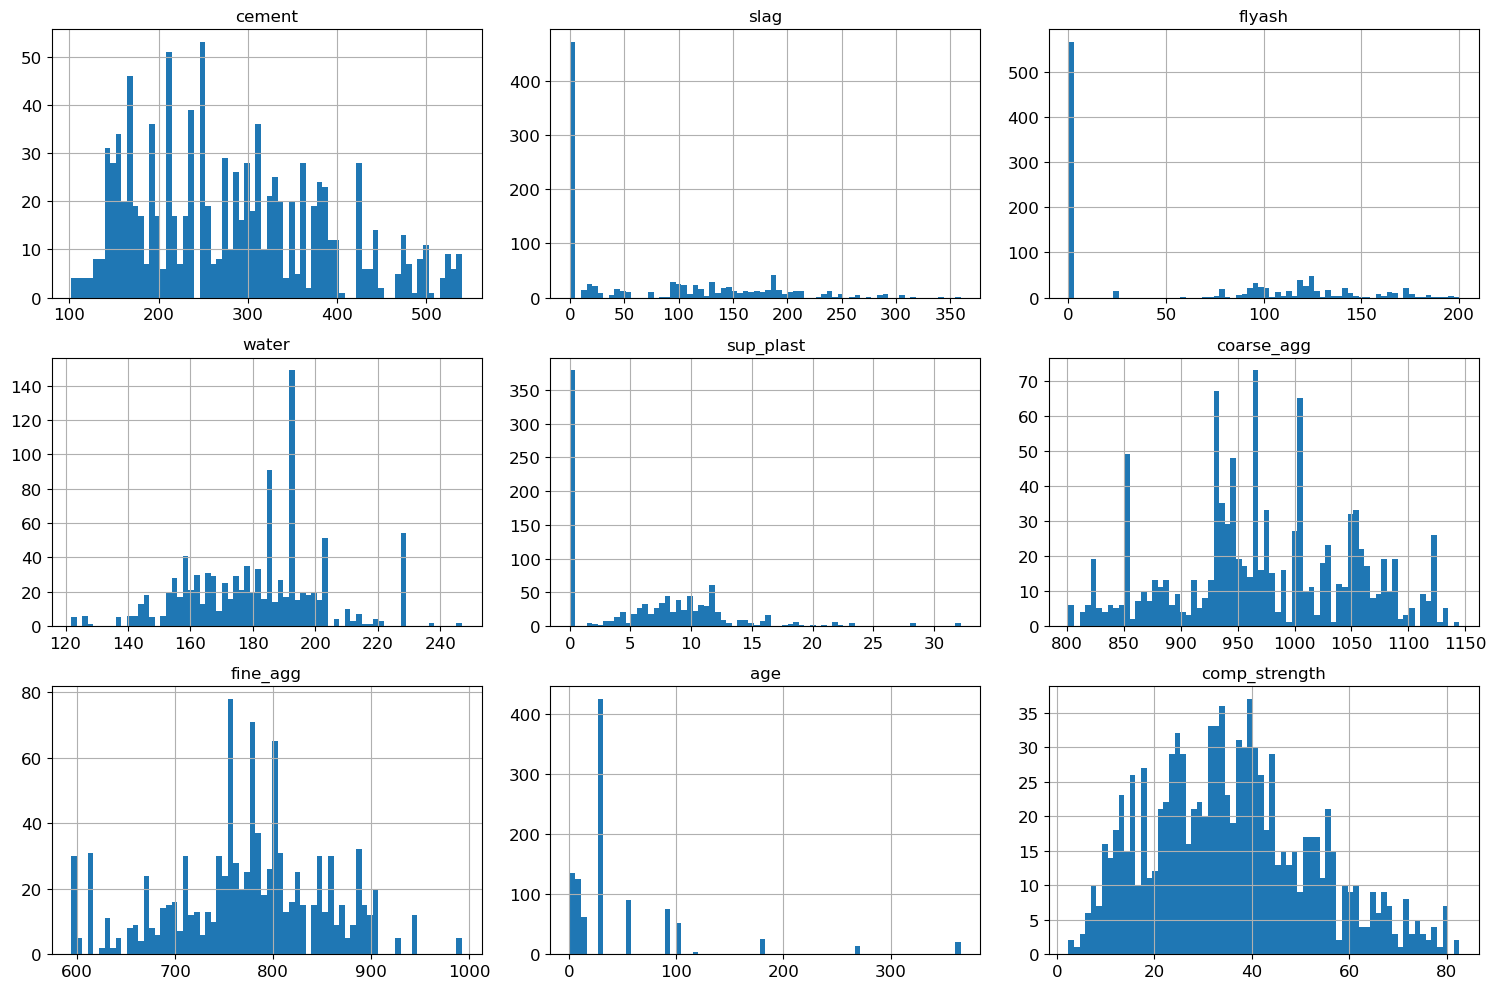

In [7]:
concrete.hist(bins=70, figsize=(15, 10))
save_fig('attribute_histogram_plots')
plt.show()

## BoxPlots

Saving figure boxplots


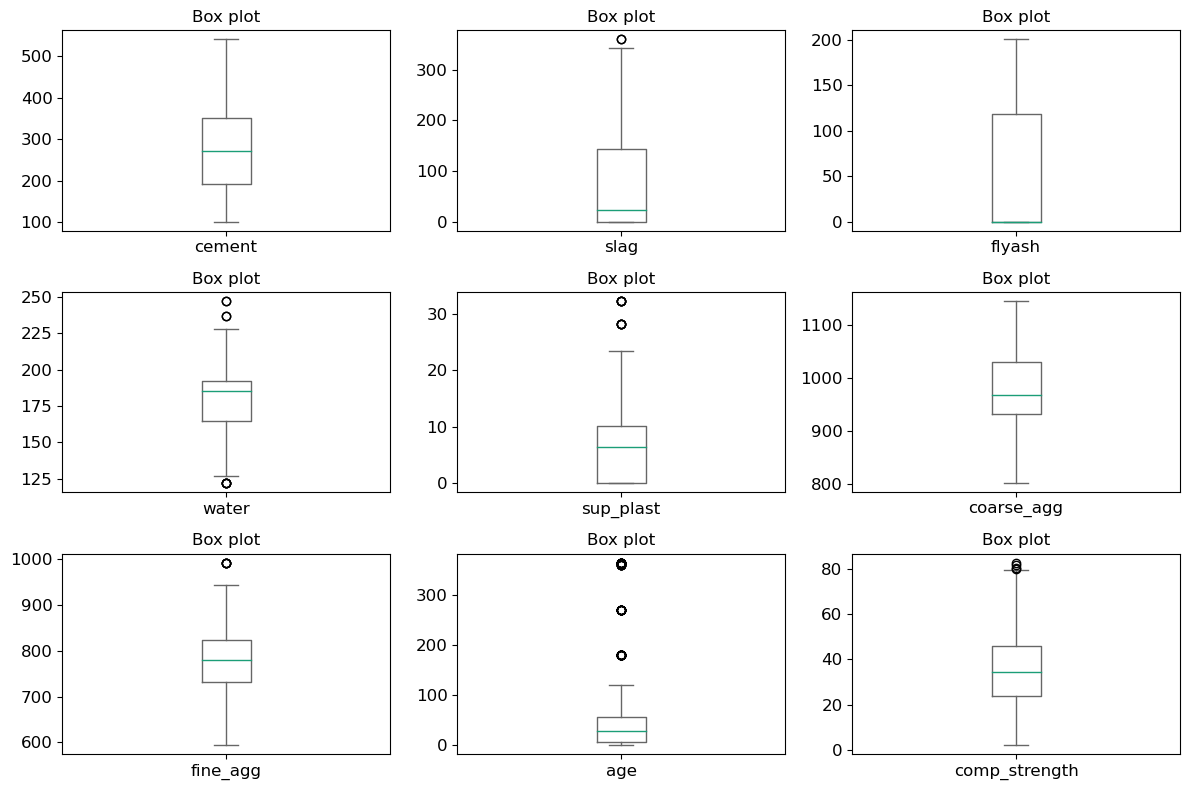

In [8]:
# box plot
fig = plt.figure(figsize = (12,8))

for idx, p in enumerate(concrete.columns):
    ax = plt.subplot(3,3, idx+1)
    #sns.barplot(x=concrete[p], ax=ax)#, saturation=0.
    concrete[p].plot(kind='box', title='Box plot', cmap='Dark2_r')
plt.tight_layout()
save_fig('boxplots')
plt.show()

## ScatterPlots
A series of plots of feature vs. target variable. We can see a clear linear correlation with cement. 

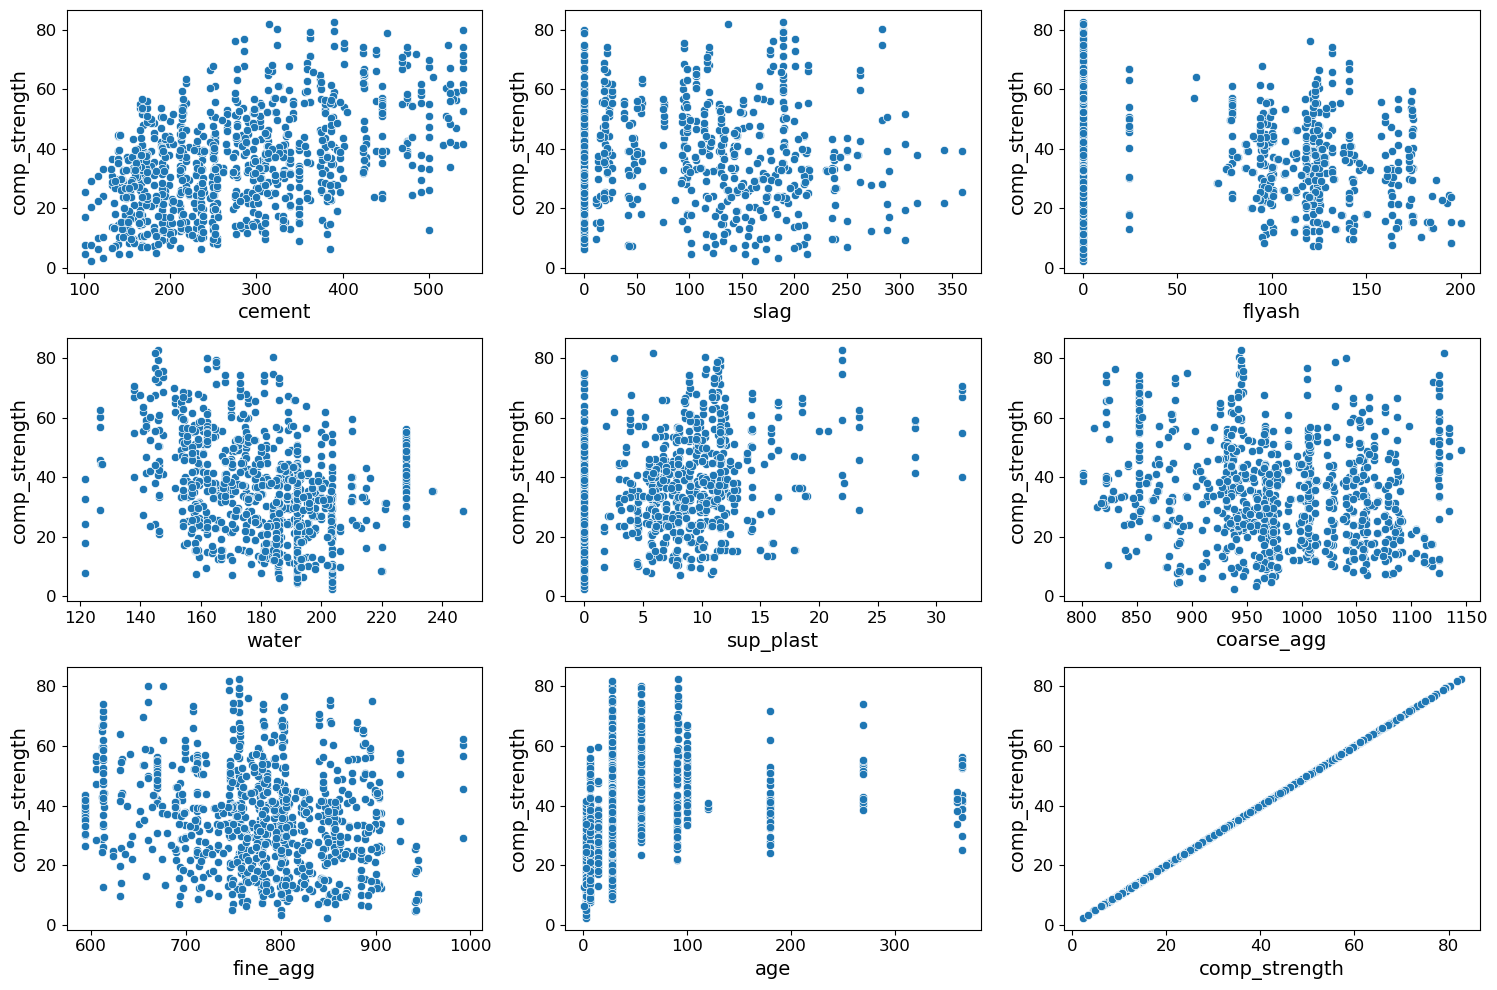

Saving figure scatter plots


<Figure size 640x480 with 0 Axes>

In [9]:
# box plot
fig = plt.figure(figsize = (15,10))

for idx, p in enumerate(concrete.columns):
    ax = plt.subplot(3,3, idx+1)
    sns.scatterplot(x=concrete[p], y= 'comp_strength', data= concrete, ax=ax)

plt.tight_layout()    
plt.show()
save_fig('scatter plots')

## Correlations
From the correlation table we can see the that in addition to cement there is also a noteable level of correlation with sup_plast, age and water

In [10]:
# correlations
concrete_corr = abs(concrete.corr(numeric_only=True))
concrete_corr_ranked = concrete_corr['comp_strength'].sort_values(ascending=False)[1:]
concrete_corr_ranked

cement        0.497832
sup_plast     0.366079
age           0.328873
water         0.289633
fine_agg      0.167241
coarse_agg    0.164935
slag          0.134829
flyash        0.105755
Name: comp_strength, dtype: float64

## Correlation Heat Map
We do see a correlation of 0.66 between water and sup_plast which could cause a collinearity issue. Lets look at this in a scatter matrix

Saving figure numeric_only heatmap


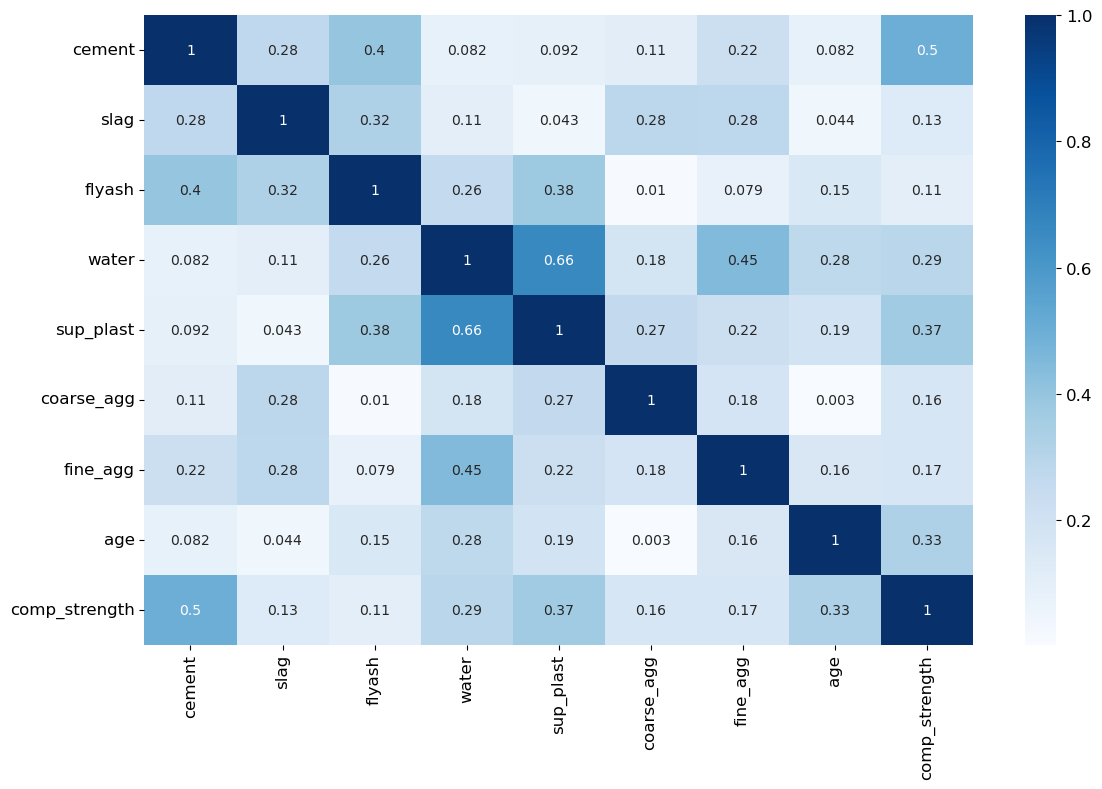

In [11]:
# Create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(concrete_corr, annot=True, cmap='Blues')

save_fig('numeric_only heatmap')

## Scatter Matrix
We can see this sup_plast/water correlation in the plot with sup_plast is on the x axis. There is a overall downward trend

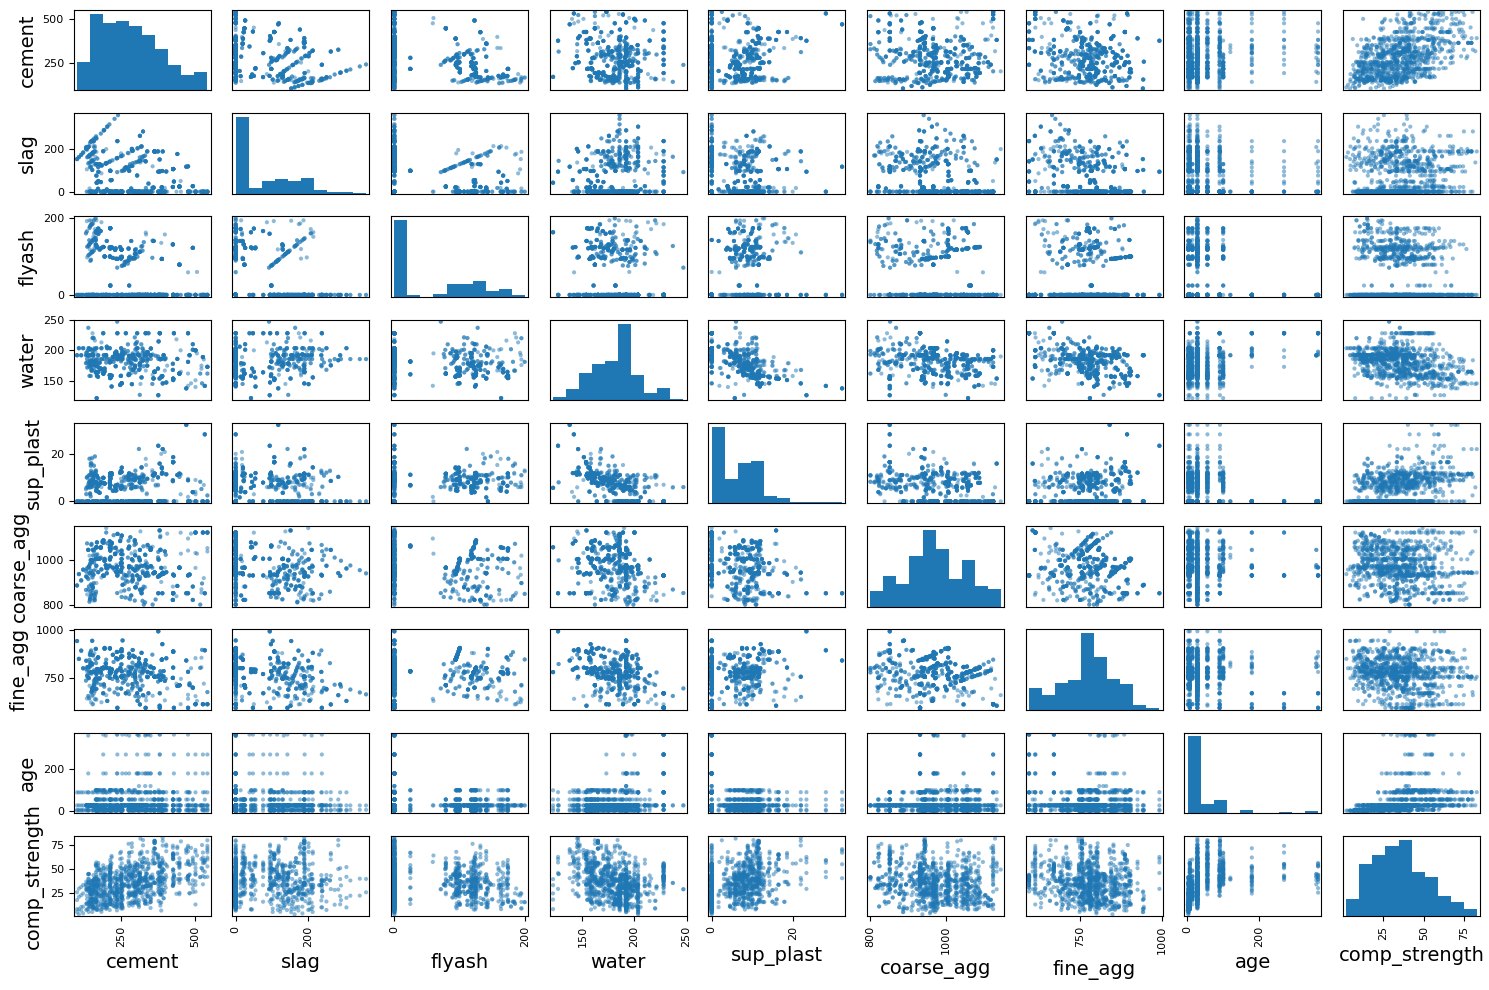

Saving figure scatter_matrix_plot


<Figure size 640x480 with 0 Axes>

In [12]:
from pandas.plotting import scatter_matrix

#attributes_num = ['Age', 'RestingBP', 'Cholesterol','MaxHR', 'Oldpeak']

scatter_matrix(concrete, figsize=(15,10))
plt.tight_layout()
plt.show()

save_fig("scatter_matrix_plot")

## EDA Insights
- No missing values
- Nothing highly lineraly correlated
- No high colinearity (need to look into further)
- Maybe some interesting correlations between feature attributes
- Also, lets rename some columns for brevity and better detail (perform before EDA)

# Preparing Data for Machine Learning Algorithms

## Create Train, Val, and Test Sets

In [13]:
from sklearn.model_selection import train_test_split

X = concrete.drop('comp_strength', axis=1)
y = concrete['comp_strength']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*(X.shape[0]/X_train.shape[0]), random_state=42)

## Feature Scaling
- The data will be standardized

In [14]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

num_feats = concrete.columns[:-1]

# create standardized X_  for continous nummerical data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[num_feats])
X_test_std = scaler_std.transform(X_test[num_feats])
X_val_std = scaler_std.transform(X_val[num_feats])

# replace standardized columns backinto X_ sets
X_train[num_feats] = X_train_std
X_val[num_feats] = X_val_std
X_test[num_feats] = X_test_std

# Create Model Pipeline all Features
Run a series of regression models and summarize the MAE and RMSE 

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [16]:
model_pipeline = []
model_pipeline.append(LinearRegression())
model_pipeline.append(SGDRegressor(random_state=42))
model_pipeline.append(DecisionTreeRegressor(random_state=42))
model_pipeline.append(GradientBoostingRegressor(random_state=42))
model_pipeline.append(RandomForestRegressor(random_state=42))
model_pipeline.append(KNeighborsRegressor())

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_list = ['Linear', 'SGD', 'DecisionTree', 'GradientBoosting', 'RandomForest', 'KNN']

mae_list = []
rmse_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_val)
    mae_list.append(mean_absolute_error(y_val, y_preds))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_preds)))

In [18]:
# Model evaulation results

results_all = pd.DataFrame({'Model':model_list, 'MAE':mae_list, 'RMSE':rmse_list})
                           
results_all = results_all.rename('{}_all'.format)
results_all.sort_values(by='RMSE')

,Model,MAE,RMSE
3_all,GradientBoosting,4.056997,5.453593
4_all,RandomForest,4.181687,5.919779
2_all,DecisionTree,4.806772,7.183008
5_all,KNN,7.076291,9.182093
0_all,Linear,7.739527,9.812649
1_all,SGD,7.759116,9.822961


# Feature Selection
Run each model with all of the featues and obtain feature attribute information that will assist in feature selection and final model creation.

## Linear Regression
- MAE and RMSE
- Coefficient Values and Intercept
- Feature attribute names corresponding to the coefficient value

In [19]:
# create lr instance
lr = LinearRegression()
# fit 
lr.fit(X_train, y_train)
# predict
preds_lr = lr.predict(X_val)
# evaluate
mae_lr = mean_absolute_error(y_val, preds_lr)
rmse_lr = np.sqrt(mean_squared_error(y_val, preds_lr))

print("mean absolute error: ", mae_lr)
print("root mean squared error: ", rmse_lr)
print("coefficient and intercept: ", lr.coef_, lr.intercept_)
print("feature names: ", lr.feature_names_in_)

lr_coef_ranked = sorted(zip(abs(lr.coef_), X_train.columns), reverse=True) # creates a list of tuples containing the coef value and feature name
display(lr_coef_ranked)
lr_coef_value = list(zip(*lr_coef_ranked))[0]       # create list of just coef values
lr_coef_feature = list(zip(*lr_coef_ranked))[1]     # create list of features names corresponding to coefficient value

mean absolute error:  7.739527052320837
root mean squared error:  9.812648773648357
coefficient and intercept:  [12.11521541  9.14606872  5.00345778 -2.64941991  2.27496435  1.24940189
  1.95494085  7.07751996] 35.914110032362466
feature names:  ['cement' 'slag' 'flyash' 'water' 'sup_plast' 'coarse_agg' 'fine_agg'
 'age']


[(12.115215414852468, 'cement'),
 (9.146068719355718, 'slag'),
 (7.077519963045452, 'age'),
 (5.0034577797157365, 'flyash'),
 (2.649419906059596, 'water'),
 (2.2749643524946985, 'sup_plast'),
 (1.9549408483030355, 'fine_agg'),
 (1.2494018927836867, 'coarse_agg')]

## Stochastic Gradient Decsent (SGD) Regression
- MAE and RMSE
- Coefficient Values and Intercept
- Feature attribute names corresponding to the coefficient value

In [20]:
# create lr instance
sgdr = SGDRegressor(random_state = 42)
# fit 
sgdr.fit(X_train, y_train)
# predict
preds_sgdr = sgdr.predict(X_val)
# evaluate
mae_sgdr = mean_absolute_error(y_val, preds_sgdr)
rmse_sgdr = np.sqrt(mean_squared_error(y_val, preds_sgdr))

print("mean absolute error: ", mae_sgdr)
print("root mean squared error: ", rmse_sgdr)
print("coefficient and intercept: ", sgdr.coef_, sgdr.intercept_)
print("feature names: ", sgdr.feature_names_in_)

sgdr_coef_ranked = sorted(zip(abs(sgdr.coef_), X_train.columns), reverse=True)  # creates a list of tuples containing the coef value and feature name
display(sgdr_coef_ranked)
sgdr_coef_value = list(zip(*sgdr_coef_ranked))[0]           # create list of just coef values
sgdr_coef_feature = list(zip(*sgdr_coef_ranked))[1]         # create list of features names corresponding to coefficient value

mean absolute error:  7.759115509215268
root mean squared error:  9.822961452761753
coefficient and intercept:  [10.79014102  7.82726849  3.88406594 -3.76267994  2.14548569  0.20858166
  0.68285006  7.08137106] [35.92036653]
feature names:  ['cement' 'slag' 'flyash' 'water' 'sup_plast' 'coarse_agg' 'fine_agg'
 'age']


[(10.790141022845699, 'cement'),
 (7.827268490887857, 'slag'),
 (7.081371058525982, 'age'),
 (3.884065944776364, 'flyash'),
 (3.7626799354861484, 'water'),
 (2.1454856859170417, 'sup_plast'),
 (0.682850063931589, 'fine_agg'),
 (0.20858165668612277, 'coarse_agg')]

## Decsion Tree Regression
- MAE and RMSE
- Feature Importances Values
- Feature Importance Names

In [21]:
# create lr instance
dtr = DecisionTreeRegressor(random_state = 42)
# fit 
dtr.fit(X_train, y_train)
# predict
preds_dtr = dtr.predict(X_val)
# evaluate
mae_dtr = mean_absolute_error(y_val, preds_dtr)
rmse_dtr = np.sqrt(mean_squared_error(y_val, preds_dtr))

print("mean absolute error: ", mae_dtr)
print("root mean squared error: ", rmse_dtr)

# get feature_importances into a list of tuples 
dtr_feature_importances = sorted(zip(dtr.feature_importances_, X_train.columns), reverse=True) # list of tuples for the feature_importances (value) and feature name
display(dtr_feature_importances)
dtr_importance_value = list(zip(*dtr_feature_importances))[0]    # list of feature importance values
dtr_importance_name = list(zip(*dtr_feature_importances))[1]     # list of featue importance names

mean absolute error:  4.806771844660194
root mean squared error:  7.183008444623601


[(0.38057009954153687, 'cement'),
 (0.3244195244838534, 'age'),
 (0.12396122756077492, 'water'),
 (0.10353677341342214, 'slag'),
 (0.02019986123798233, 'fine_agg'),
 (0.020002918291625506, 'sup_plast'),
 (0.019101249923323307, 'coarse_agg'),
 (0.008208345547481509, 'flyash')]

## GradientBoosting Regression
- MAE and RMSE
- Feature Importances Values
- Feature Importance Names

In [22]:
# create lr instance
gbr = GradientBoostingRegressor(random_state = 42)
# fit 
gbr.fit(X_train, y_train)
# predict
preds_gbr = gbr.predict(X_val)
# evaluate
mae_gbr = mean_absolute_error(y_val, preds_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_val, preds_gbr))

print("mean absolute error: ", mae_gbr)
print("root mean squared error: ", rmse_gbr)

# get feature_importances into a list of tuples 
gbr_feature_importances = sorted(zip(gbr.feature_importances_, X_train.columns), reverse=True)  # list of tuples for the feature_importances (value) and feature name
display(gbr_feature_importances)
gbr_importance_value = list(zip(*gbr_feature_importances))[0]    # list of feature importance values
gbr_importance_name = list(zip(*gbr_feature_importances))[1]     # list of featue importance names

mean absolute error:  4.056997093290055
root mean squared error:  5.45359254825066


[(0.35938482385214, 'age'),
 (0.30726439810974626, 'cement'),
 (0.12703904341715072, 'water'),
 (0.07492280850480486, 'slag'),
 (0.06218711931860155, 'sup_plast'),
 (0.04074667370023631, 'fine_agg'),
 (0.014409227063377314, 'flyash'),
 (0.014045906033943005, 'coarse_agg')]

## RandomForest Regression
- MAE and RMSE
- Feature Importances Values
- Feature Importance Names

In [23]:
# create lr instance
rfr = RandomForestRegressor(random_state = 42)
# fit 
rfr.fit(X_train, y_train)
# predict
preds_rfr = rfr.predict(X_val)
# evaluate
mae_rfr = mean_absolute_error(y_val, preds_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_val, preds_rfr))

print("mean absolute error: ", mae_rfr)
print("root mean squared error: ", rmse_rfr)

# get feature_importances into a list of tuples 
rfr_feature_importances = sorted(zip(rfr.feature_importances_, X_train.columns), reverse=True)  # list of tuples for the feature_importances (value) and feature name
display(rfr_feature_importances)
rfr_importance_value = list(zip(*rfr_feature_importances))[0]   # list of feature importance values
rfr_importance_name = list(zip(*rfr_feature_importances))[1]    # list of featue importance names

mean absolute error:  4.1816867724225615
root mean squared error:  5.919779459849041


[(0.33514410038302805, 'age'),
 (0.31900724685554144, 'cement'),
 (0.13897152193139523, 'water'),
 (0.06995372421827908, 'slag'),
 (0.04664808957653405, 'sup_plast'),
 (0.039990679597188133, 'fine_agg'),
 (0.029766364536821358, 'coarse_agg'),
 (0.020518272901212463, 'flyash')]

## KNN Regression
- Build a KNN model that run each feature individually to potentially gain some feature attribute insight

### KNN Regressor with One Feature
- Nothing of value here other than maybe the order

In [24]:
# KNN model to run each feature individually
features = X_train.columns

feat_list = []
mae_list = []
rmse_list = []

for feature in features:
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train[[feature]], y_train)  
    y_preds = knn.predict(X_val[[feature]])
    feat_list.append(feature)
    mae_list.append(mean_absolute_error(y_val, y_preds))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_preds)))
    

In [25]:
# Model evaulation results

results_knn = pd.DataFrame({'Feature':feat_list, 'MAE':mae_list, 'RMSE':rmse_list})
                           
results_knn = results_knn.rename('{}_knn'.format)
results_knn = results_knn.sort_values(by='RMSE')
results_knn

,Feature,MAE,RMSE
7_knn,age,10.848330,13.128876
3_knn,water,11.488650,14.387661
0_knn,cement,11.960417,14.680734
4_knn,sup_plast,12.756340,15.418358
5_knn,coarse_agg,12.661301,16.069289
6_knn,fine_agg,12.901883,16.165951
1_knn,slag,14.312942,17.162331
2_knn,flyash,14.226796,17.356489


# Top Features
Compare the feature selection results to provide direction on feature selections
- Correlations
- Coefficients
- Feature importances
- KNN single feature results

## Create df for Features Importance, Coefficients, Correlations, KNN single features

In [26]:
# create summary dfs from the infromation obtained from Feature Selection

top_features_df = pd.DataFrame({'correlations': concrete_corr_ranked.index, 'corr_value':concrete_corr_ranked.tolist(), 
                                'lr_coef_feature':lr_coef_feature,'lr_coef_value':lr_coef_value, 'sgdr_coef_feature':sgdr_coef_feature,
                               'sgdr_coef_value':sgdr_coef_value, 'dtr_importance_feature':dtr_importance_name, 'dtr_importance_value':dtr_importance_value,
                               'gbr_importance_feature': gbr_importance_name, 'gbr_importance_value': gbr_importance_value,
                               'rfr_importance_feature': rfr_importance_name, 'rfr_importance_value': rfr_importance_value,
                               'knn_single_features': results_knn['Feature']})

top_features_df

,correlations,corr_value,lr_coef_feature,lr_coef_value,sgdr_coef_feature,sgdr_coef_value,dtr_importance_feature,dtr_importance_value,gbr_importance_feature,gbr_importance_value,rfr_importance_feature,rfr_importance_value,knn_single_features
7_knn,cement,0.497832,cement,12.115215,cement,10.790141,cement,0.380570,age,0.359385,age,0.335144,age
3_knn,sup_plast,0.366079,slag,9.146069,slag,7.827268,age,0.324420,cement,0.307264,cement,0.319007,water
0_knn,age,0.328873,age,7.077520,age,7.081371,water,0.123961,water,0.127039,water,0.138972,cement
4_knn,water,0.289633,flyash,5.003458,flyash,3.884066,slag,0.103537,slag,0.074923,slag,0.069954,sup_plast
5_knn,fine_agg,0.167241,water,2.649420,water,3.762680,fine_agg,0.020200,sup_plast,0.062187,sup_plast,0.046648,coarse_agg
6_knn,coarse_agg,0.164935,sup_plast,2.274964,sup_plast,2.145486,sup_plast,0.020003,fine_agg,0.040747,fine_agg,0.039991,fine_agg
1_knn,slag,0.134829,fine_agg,1.954941,fine_agg,0.682850,coarse_agg,0.019101,flyash,0.014409,coarse_agg,0.029766,slag
2_knn,flyash,0.105755,coarse_agg,1.249402,coarse_agg,0.208582,flyash,0.008208,coarse_agg,0.014046,flyash,0.020518,flyash


### Select Appropriate Range

In [27]:
features_top = top_features_df[:5]
features_top

,correlations,corr_value,lr_coef_feature,lr_coef_value,sgdr_coef_feature,sgdr_coef_value,dtr_importance_feature,dtr_importance_value,gbr_importance_feature,gbr_importance_value,rfr_importance_feature,rfr_importance_value,knn_single_features
7_knn,cement,0.497832,cement,12.115215,cement,10.790141,cement,0.380570,age,0.359385,age,0.335144,age
3_knn,sup_plast,0.366079,slag,9.146069,slag,7.827268,age,0.324420,cement,0.307264,cement,0.319007,water
0_knn,age,0.328873,age,7.077520,age,7.081371,water,0.123961,water,0.127039,water,0.138972,cement
4_knn,water,0.289633,flyash,5.003458,flyash,3.884066,slag,0.103537,slag,0.074923,slag,0.069954,sup_plast
5_knn,fine_agg,0.167241,water,2.649420,water,3.762680,fine_agg,0.020200,sup_plast,0.062187,sup_plast,0.046648,coarse_agg


### Value Counts to determine top features

In [28]:
# combining the labels of the features_top into a single array of arrays
import more_itertools
features_count = np.vstack((features_top['sgdr_coef_feature'], features_top['lr_coef_feature'], features_top['gbr_importance_feature'], 
                            features_top['rfr_importance_feature'], features_top['lr_coef_feature'], features_top['correlations'], 
                            features_top['knn_single_features']))#, features_top['associations']))
# converting array of arrays into flat list
feat_count = feat_count = list(more_itertools.flatten(features_count))
# new df and count values
features_count_df = pd.DataFrame({'counts':feat_count})
features_count_df.value_counts()

counts    
age           7
cement        7
water         7
slag          5
sup_plast     4
flyash        3
coarse_agg    1
fine_agg      1
dtype: int64

### Top Feature Selection
We can use this as a tool to select various top feature list. Just select the range based off of desired value count infromation

In [29]:
top_features = features_count_df.value_counts()[0:7].reset_index()#drop=True)
top_features = top_features['counts'].tolist()
top_features

['age', 'cement', 'water', 'slag', 'sup_plast', 'flyash', 'coarse_agg']

# Model Pipeline with Top 6 Features

In [30]:
top_features = features_count_df.value_counts()[0:6].reset_index()#drop=True)
top_features = top_features['counts'].tolist()
top_features

['age', 'cement', 'water', 'slag', 'sup_plast', 'flyash']

In [31]:
model_list = ['Linear', 'SGD', 'DecisionTree', 'GradientBoosting', 'RandomForest', 'KNN']

mae_list = []
rmse_list = []

for model in model_pipeline:
    model.fit(X_train[top_features], y_train)
    y_preds = model.predict(X_val[top_features])
    mae_list.append(mean_absolute_error(y_val, y_preds))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_preds)))

In [32]:
# Model evaulation results

results_top6 = pd.DataFrame({'Model':model_list, 'MAE':mae_list, 'RMSE':rmse_list})
                           
results_top6 = results_top6.rename('{}_top6'.format)
results_top6.sort_values(by='RMSE')

,Model,MAE,RMSE
3_top6,GradientBoosting,4.184175,5.550293
4_top6,RandomForest,4.130609,5.750561
2_top6,DecisionTree,4.813738,7.197411
5_top6,KNN,6.572155,8.671268
1_top6,SGD,7.748257,9.765603
0_top6,Linear,7.748348,9.785512


# Model Pipeline with Top 4 Feature

In [33]:
top_features = features_count_df.value_counts()[0:4].reset_index()#drop=True)
top_features = top_features['counts'].tolist()
top_features

['age', 'cement', 'water', 'slag']

In [34]:
model_list = ['Linear', 'SGD', 'DecisionTree', 'GradientBoosting', 'RandomForest', 'KNN']

mae_list = []
rmse_list = []

for model in model_pipeline:
    model.fit(X_train[top_features], y_train)
    y_preds = model.predict(X_val[top_features])
    mae_list.append(mean_absolute_error(y_val, y_preds))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_preds)))

In [35]:
# Model evaulation results

results_top4 = pd.DataFrame({'Model':model_list, 'MAE':mae_list, 'RMSE':rmse_list})
                           
results_top4 = results_top4.rename('{}_top4'.format)
results_top4.sort_values(by='RMSE')

,Model,MAE,RMSE
4_top4,RandomForest,4.277499,6.034192
3_top4,GradientBoosting,4.610960,6.039394
2_top4,DecisionTree,4.710825,7.070806
5_top4,KNN,6.324515,7.998956
1_top4,SGD,8.900965,10.957638
0_top4,Linear,8.898077,10.978329


# Model Performance Summary 1

In [36]:
results_summary1 = pd.concat([results_all, results_top6, results_top4], axis=0)
results_summary1.sort_values(by='RMSE')

,Model,MAE,RMSE
3_all,GradientBoosting,4.056997,5.453593
3_top6,GradientBoosting,4.184175,5.550293
4_top6,RandomForest,4.130609,5.750561
4_all,RandomForest,4.181687,5.919779
4_top4,RandomForest,4.277499,6.034192
3_top4,GradientBoosting,4.610960,6.039394
2_top4,DecisionTree,4.710825,7.070806
2_all,DecisionTree,4.806772,7.183008
2_top6,DecisionTree,4.813738,7.197411
5_top4,KNN,6.324515,7.998956


# MultiCollinearity
Lets look further into any collinearity between attributes by calcualting VIF and then using this information to experimnent with different combination of attributes to change the VIF values and resutling performance measures

In [37]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):    
    vif, tolerance = {}, {}    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

## VIF with all Features

In [38]:
features = concrete.columns[:-1]
features

Index(['cement', 'slag', 'flyash', 'water', 'sup_plast', 'coarse_agg',
       'fine_agg', 'age'],
      dtype='object')

In [39]:
calculate_vif(concrete,features).sort_values(by='VIF', ascending=False)

,VIF,Tolerance
cement,7.488944,0.133530
slag,7.276963,0.137420
fine_agg,7.005081,0.142754
water,7.003957,0.142776
flyash,6.170634,0.162058
coarse_agg,5.074617,0.197059
sup_plast,2.963776,0.337407
age,1.118367,0.894161


## Best VIF
- Interate through different combinations of features
- Not much of value to conclude. Lets do some feature engineering and revisit this again later

In [40]:
features = ['cement', 'slag', 'flyash', 'water', 'sup_plast', 'coarse_agg','fine_agg', 'age']
features

['cement',
 'slag',
 'flyash',
 'water',
 'sup_plast',
 'coarse_agg',
 'fine_agg',
 'age']

In [41]:
calculate_vif(concrete,features).sort_values(by='VIF', ascending=False)

,VIF,Tolerance
cement,7.488944,0.133530
slag,7.276963,0.137420
fine_agg,7.005081,0.142754
water,7.003957,0.142776
flyash,6.170634,0.162058
coarse_agg,5.074617,0.197059
sup_plast,2.963776,0.337407
age,1.118367,0.894161


In [42]:
top_features = features

In [43]:
model_list = ['Linear', 'SGD', 'DecisionTree', 'GradientBoosting', 'RandomForest', 'KNN']

mae_list = []
rmse_list = []

for model in model_pipeline:
    model.fit(X_train[top_features], y_train)
    y_preds = model.predict(X_val[top_features])
    mae_list.append(mean_absolute_error(y_val, y_preds))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_preds)))

In [44]:
# Model evaulation results

results_vif = pd.DataFrame({'Model':model_list, 'MAE':mae_list, 'RMSE':rmse_list})
                           
results_vif = results_vif.rename('{}_vif'.format)
results_vif.sort_values(by='RMSE')

,Model,MAE,RMSE
3_vif,GradientBoosting,4.056997,5.453593
4_vif,RandomForest,4.181687,5.919779
2_vif,DecisionTree,4.806772,7.183008
5_vif,KNN,7.076291,9.182093
0_vif,Linear,7.739527,9.812649
1_vif,SGD,7.759116,9.822961


# Feature Engineering
- Perform log transform (log10) on the dataset to improve distributions

## Log Transform skewed attributes

In [45]:
# create new df
concrete_trans = concrete.copy()

In [46]:
for i in concrete_trans.columns[:-1]:
    concrete_trans[i] = concrete_trans[i].apply(lambda x: np.log10(x+1))

In [47]:
concrete_trans.head()

,cement,slag,flyash,water,sup_plast,coarse_agg,fine_agg,age,comp_strength
0,2.733197,0.000000,0.0,2.212188,0.544068,3.017451,2.830589,1.462398,79.99
1,2.733197,0.000000,0.0,2.212188,0.544068,3.023664,2.830589,1.462398,61.89
2,2.523096,2.156852,0.0,2.359835,0.000000,2.969882,2.774517,2.432969,40.27
3,2.523096,2.156852,0.0,2.359835,0.000000,2.969882,2.774517,2.563481,41.05
4,2.300161,2.125156,0.0,2.285557,0.000000,2.990960,2.917243,2.557507,44.30


### Histogram

Saving figure attribute_histogram_plots_trans


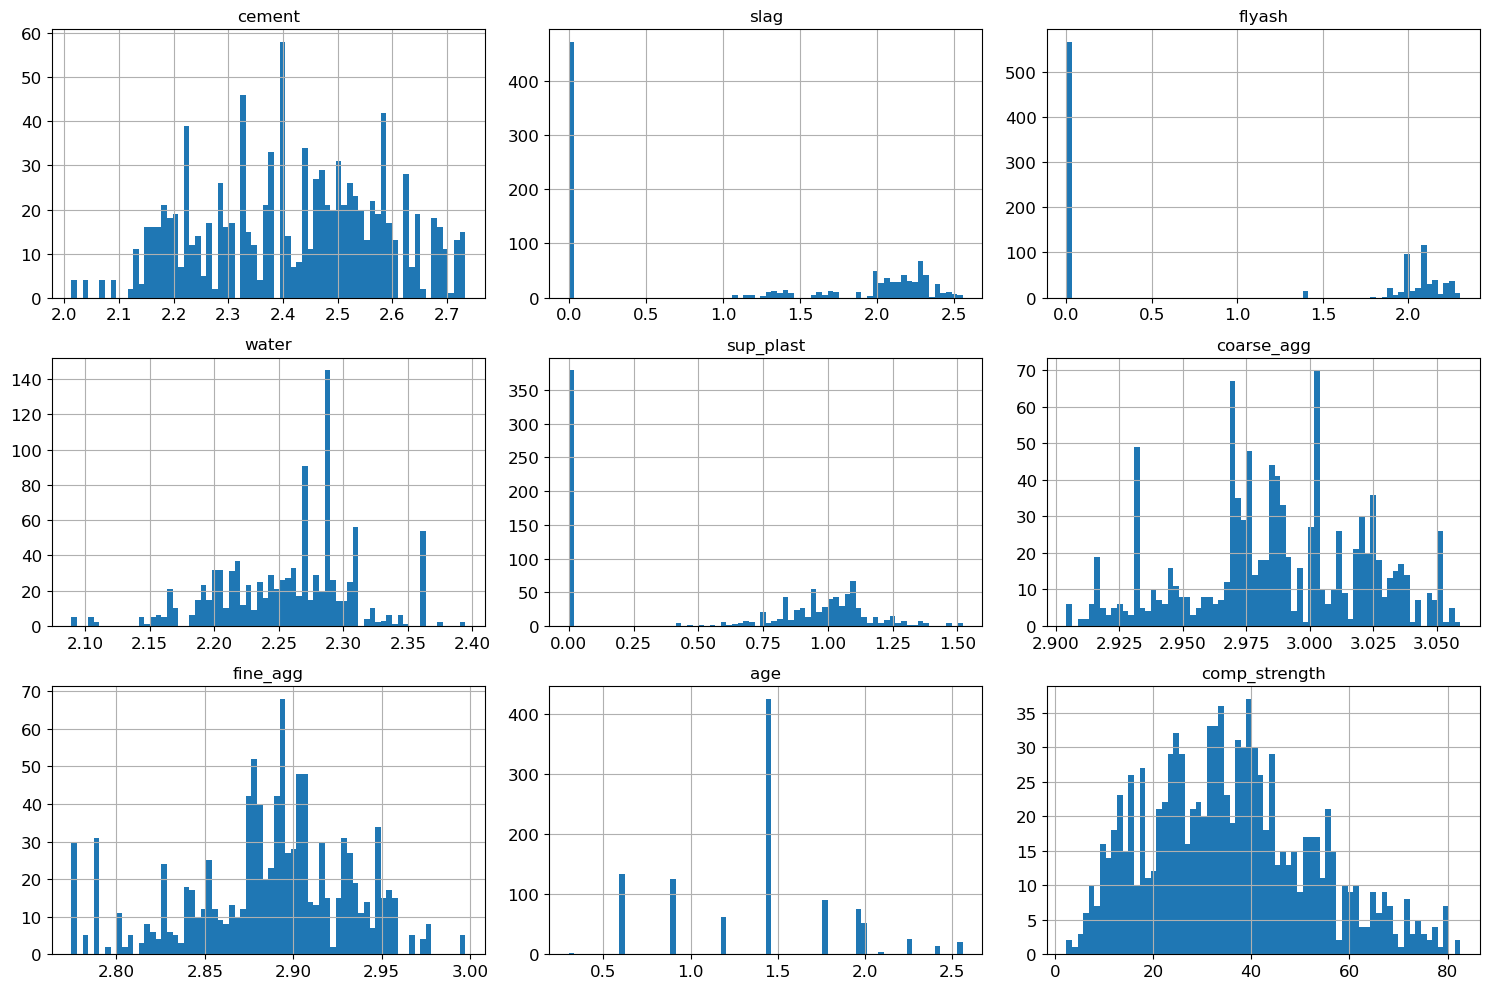

In [48]:
concrete_trans.hist(bins=70, figsize=(15,10))
save_fig('attribute_histogram_plots_trans')
plt.show()

### Create test, val, and test sets

In [49]:
from sklearn.model_selection import train_test_split

X = concrete_trans.drop('comp_strength', axis=1)
y = concrete_trans['comp_strength']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*(X.shape[0]/X_train.shape[0]), random_state=42)

### Feature Scaling

In [50]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

num_feats = concrete.columns[:-1]

# create standardized X_  for continous nummerical data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[num_feats])
X_test_std = scaler_std.transform(X_test[num_feats])
X_val_std = scaler_std.transform(X_val[num_feats])

# replace standardized columns backinto X_ sets
X_train[num_feats] = X_train_std
X_val[num_feats] = X_val_std
X_test[num_feats] = X_test_std

### Model Pipeline following Transform

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_list = ['Linear', 'SGD', 'DecisionTree', 'GradientBoosting', 'RandomForest', 'KNN']

mae_list = []
rmse_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_val)
    mae_list.append(mean_absolute_error(y_val, y_preds))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_preds)))

In [52]:
# Model evaulation results

results_Xall = pd.DataFrame({'Model':model_list, 'MAE':mae_list, 'RMSE':rmse_list})
                           
results_Xall = results_Xall.rename('{}_Xall'.format)
results_Xall.sort_values(by='RMSE')

,Model,MAE,RMSE
3_Xall,GradientBoosting,4.060020,5.457201
4_Xall,RandomForest,4.166149,5.890585
5_Xall,KNN,5.237049,7.012717
1_Xall,SGD,5.641698,7.054256
0_Xall,Linear,5.642976,7.054302
2_Xall,DecisionTree,4.775510,7.167032


In [53]:
# quick compare for Xall with all
results_summary1[0:6]#.sort_values(by='RMSE')

,Model,MAE,RMSE
0_all,Linear,7.739527,9.812649
1_all,SGD,7.759116,9.822961
2_all,DecisionTree,4.806772,7.183008
3_all,GradientBoosting,4.056997,5.453593
4_all,RandomForest,4.181687,5.919779
5_all,KNN,7.076291,9.182093


Overall improvement using the data transformed (log10), while not much different with RandomForest, GradientBoosting, and DecsionTree. The linear, SGD, and KNN had better results using the transformed data.

Lets create a new column representing a ratio of fine and coarse aggregate

## Create Fine/Coarse Aggregate Ratio Attribute

In [54]:
# new df with transformed data
concrete_agg = concrete_trans.copy()

In [55]:
#create new attribute 
concrete_agg['coarse_fine'] = concrete_agg['coarse_agg'] / concrete_agg['fine_agg']

In [56]:
concrete_agg.head()

,cement,slag,flyash,water,sup_plast,coarse_agg,fine_agg,age,comp_strength,coarse_fine
0,2.733197,0.000000,0.0,2.212188,0.544068,3.017451,2.830589,1.462398,79.99,1.066015
1,2.733197,0.000000,0.0,2.212188,0.544068,3.023664,2.830589,1.462398,61.89,1.068210
2,2.523096,2.156852,0.0,2.359835,0.000000,2.969882,2.774517,2.432969,40.27,1.070414
3,2.523096,2.156852,0.0,2.359835,0.000000,2.969882,2.774517,2.563481,41.05,1.070414
4,2.300161,2.125156,0.0,2.285557,0.000000,2.990960,2.917243,2.557507,44.30,1.025269


### Create test, val , test sets

In [57]:
from sklearn.model_selection import train_test_split

X = concrete_agg.drop('comp_strength', axis=1)
y = concrete_agg['comp_strength']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*(X.shape[0]/X_train.shape[0]), random_state=42)

In [58]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

num_feats = X_train.columns

# create standardized X_  for continous nummerical data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[num_feats])
X_test_std = scaler_std.transform(X_test[num_feats])
X_val_std = scaler_std.transform(X_val[num_feats])

# replace standardized columns backinto X_ sets
X_train[num_feats] = X_train_std
X_val[num_feats] = X_val_std
X_test[num_feats] = X_test_std

### Model Pipeline 

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

model_list = ['Linear', 'SGD', 'DecisionTree', 'GradientBoosting', 'RandomForest', 'KNN']

mae_list = []
rmse_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_val)
    mae_list.append(mean_absolute_error(y_val, y_preds))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_preds)))

In [60]:
# Model evaulation results

results_agg = pd.DataFrame({'Model':model_list, 'MAE':mae_list, 'RMSE':rmse_list})
                           
results_agg = results_agg.rename('{}_agg'.format)
results_agg.sort_values(by='RMSE')

,Model,MAE,RMSE
3_agg,GradientBoosting,4.085195,5.420262
4_agg,RandomForest,4.129400,5.881991
1_agg,SGD,5.641427,7.053863
0_agg,Linear,5.680217,7.115766
5_agg,KNN,5.408951,7.211669
2_agg,DecisionTree,5.076286,7.380013


Not much change. Lets revist the VIF

### VIF

In [61]:
features = X_train.columns
features

Index(['cement', 'slag', 'flyash', 'water', 'sup_plast', 'coarse_agg',
       'fine_agg', 'age', 'coarse_fine'],
      dtype='object')

In [62]:
calculate_vif(concrete_agg,features).sort_values(by='VIF', ascending=False)

,VIF,Tolerance
coarse_fine,2529.594043,0.000395
fine_agg,1454.818189,0.000687
coarse_agg,740.790568,0.001350
water,3.953475,0.252942
sup_plast,3.614249,0.276683
flyash,3.123193,0.320185
slag,2.954808,0.338431
cement,2.665836,0.375117
age,1.040623,0.960962


In [63]:
features = ['cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg']
features

['cement',
 'slag',
 'water',
 'flyash',
 'sup_plast',
 'age',
 'coarse_fine',
 'fine_agg']

In [64]:
calculate_vif(concrete_agg,features).sort_values(by='VIF', ascending=False)

,VIF,Tolerance
fine_agg,12.960002,0.077160
coarse_fine,8.889514,0.112492
water,3.865202,0.258719
sup_plast,3.614246,0.276683
flyash,2.970696,0.336621
slag,2.907279,0.343964
cement,2.662396,0.375602
age,1.036230,0.965037


In [65]:
top_features = features

In [66]:
model_list = ['Linear', 'SGD', 'DecisionTree', 'GradientBoosting', 'RandomForest', 'KNN']

mae_list = []
rmse_list = []

for model in model_pipeline:
    model.fit(X_train[top_features], y_train)
    y_preds = model.predict(X_val[top_features])
    mae_list.append(mean_absolute_error(y_val, y_preds))
    rmse_list.append(np.sqrt(mean_squared_error(y_val, y_preds)))

In [67]:
# Model evaulation results

results_agg_vif = pd.DataFrame({'Model':model_list, 'MAE':mae_list, 'RMSE':rmse_list})
                           
results_agg_vif = results_agg_vif.rename('{}_agg_vif'.format)
results_agg_vif.sort_values(by='RMSE')

,Model,MAE,RMSE
3_agg_vif,GradientBoosting,4.056107,5.392433
4_agg_vif,RandomForest,4.133780,5.824738
0_agg_vif,Linear,5.644965,7.057939
1_agg_vif,SGD,5.649148,7.060824
2_agg_vif,DecisionTree,4.908325,7.070269
5_agg_vif,KNN,5.429971,7.363308


In [68]:
# quick compare of previous models
results_agg.sort_values(by='RMSE')

,Model,MAE,RMSE
3_agg,GradientBoosting,4.085195,5.420262
4_agg,RandomForest,4.129400,5.881991
1_agg,SGD,5.641427,7.053863
0_agg,Linear,5.680217,7.115766
5_agg,KNN,5.408951,7.211669
2_agg,DecisionTree,5.076286,7.380013


In [69]:
# quick compare of previous models
results_Xall.sort_values(by='RMSE')

,Model,MAE,RMSE
3_Xall,GradientBoosting,4.060020,5.457201
4_Xall,RandomForest,4.166149,5.890585
5_Xall,KNN,5.237049,7.012717
1_Xall,SGD,5.641698,7.054256
0_Xall,Linear,5.642976,7.054302
2_Xall,DecisionTree,4.775510,7.167032


## Best Models following Feature Engineering
- Transforming the data using log10
- Created new attribute 'coasrse_fine' which is the ratio of coarse and fine aggregates (coarse_agg / fine_agg)
- After analyizing VIF values/results with differnent combos of features the models that performed the best contained the following features:
    - 'cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg'

# Model Performance Summary2
- All the top models are GradientBoosting or RandomForest
- Let look at some other models before performing any model optimizations

In [70]:
results_summary2 = pd.concat([results_all, results_top6, results_top4, results_Xall, results_agg, results_agg_vif], axis=0)
results_summary2.sort_values(by='RMSE')#[:10]

,Model,MAE,RMSE
3_agg_vif,GradientBoosting,4.056107,5.392433
3_agg,GradientBoosting,4.085195,5.420262
3_all,GradientBoosting,4.056997,5.453593
3_Xall,GradientBoosting,4.060020,5.457201
3_top6,GradientBoosting,4.184175,5.550293
4_top6,RandomForest,4.130609,5.750561
4_agg_vif,RandomForest,4.133780,5.824738
4_agg,RandomForest,4.129400,5.881991
4_Xall,RandomForest,4.166149,5.890585
4_all,RandomForest,4.181687,5.919779


# Additional Model Exploration
Lets evaluate a few more models before selecting the top models for further optimization

In [71]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [72]:
from sklearn.model_selection import train_test_split

X = concrete_agg.drop('comp_strength', axis=1)
y = concrete_agg['comp_strength']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*(X.shape[0]/X_train.shape[0]), random_state=42)

In [73]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

num_feats = X_train.columns

# create standardized X_  for continous nummerical data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[num_feats])
X_test_std = scaler_std.transform(X_test[num_feats])
X_val_std = scaler_std.transform(X_val[num_feats])

# replace standardized columns backinto X_ sets
X_train[num_feats] = X_train_std
X_val[num_feats] = X_val_std
X_test[num_feats] = X_test_std

## GaussianProcess Regressor
- DataFrame: concrete_agg
- Features:
    - Model 1: All
    - Model 2: 'cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg'

### Model 1

In [74]:
gpr = GaussianProcessRegressor()

gpr.fit(X_train, y_train)

preds_gpr = gpr.predict(X_val)

# evaluate
mae_gpr = mean_absolute_error(y_val, preds_gpr)
rmse_gpr = np.sqrt(mean_squared_error(y_val, preds_gpr))

print("mean absolute error: ", mae_gpr)
print("root mean squared error: ", rmse_gpr)

mean absolute error:  7.502373951197195
root mean squared error:  24.14269689618456


### Model 2

In [75]:
gpr = GaussianProcessRegressor()

gpr.fit(X_train[top_features], y_train)

preds_gpr = gpr.predict(X_val[top_features])

# evaluate
mae_gpr = mean_absolute_error(y_val, preds_gpr)
rmse_gpr = np.sqrt(mean_squared_error(y_val, preds_gpr))

print("mean absolute error: ", mae_gpr)
print("root mean squared error: ", rmse_gpr)

mean absolute error:  9.07347035098878
root mean squared error:  38.519430314168375


## Support Vector Regressor
- DataFrame: concrete_agg
- Model 1
    - Features: All
    - kernel: linear
- Model 2
    - Features: 'cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg'
    - kernel: linear
- Model 3
    - Features: 'cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg'
    - kernel: rbf

### Model 1

In [76]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)

preds_svr = svr.predict(X_val)

# evaluate
mae_svr = mean_absolute_error(y_val, preds_svr)
rmse_svr = np.sqrt(mean_squared_error(y_val, preds_svr))

print("mean absolute error: ", mae_svr)
print("root mean squared error: ", rmse_svr)

mean absolute error:  5.6130656975365865
root mean squared error:  7.041583961185696


### Model 2

In [77]:
svr = SVR(kernel='linear')

svr.fit(X_train[top_features], y_train)

preds_svr = svr.predict(X_val[top_features])

# evaluate
mae_svr = mean_absolute_error(y_val, preds_svr)
rmse_svr = np.sqrt(mean_squared_error(y_val, preds_svr))

print("mean absolute error: ", mae_svr)
print("root mean squared error: ", rmse_svr)

mean absolute error:  5.6183634281915635
root mean squared error:  7.0443191530568665


### Model 3

In [78]:
svr = SVR(kernel='rbf')

svr.fit(X_train[top_features], y_train)

preds_svr = svr.predict(X_val[top_features])

# evaluate
mae_svr = mean_absolute_error(y_val, preds_svr)
rmse_svr = np.sqrt(mean_squared_error(y_val, preds_svr))

print("mean absolute error: ", mae_svr)
print("root mean squared error: ", rmse_svr)

mean absolute error:  5.956765410957898
root mean squared error:  7.660143391718461


## Polynomial Regressor
- DataFrame: concrete_agg
    - Features: All
    - degree: 2

In [79]:
poly_feats = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_feats.fit_transform(X)

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*(X.shape[0]/X_train.shape[0]), random_state=42)

In [81]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

#num_feats = X.columns

# create standardized X_  for continous nummerical data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)
X_val_std = scaler_std.transform(X_val)

# replace standardized columns backinto X_ sets
# X_train[num_feats] = X_train_std
# X_val[num_feats] = X_val_std
# X_test[num_feats] = X_test_std

In [82]:
plr = LinearRegression()

plr.fit(X_train_std, y_train)

preds_plr = plr.predict(X_val_std)

# evaluate
mae_plr = mean_absolute_error(y_val, preds_plr)
rmse_plr = np.sqrt(mean_squared_error(y_val, preds_plr))

print("mean absolute error: ", mae_plr)
print("root mean squared error: ", rmse_plr)

mean absolute error:  4.376529702153398
root mean squared error:  5.879125445474307


## Additional Model Performance

In [83]:
# Model evaulation results

results_exall = pd.DataFrame({'Model': ['GPR', 'SVR', 'PolyLinear'], 'MAE':[mae_gpr, mae_svr, mae_plr], 
                              'RMSE':[rmse_gpr, rmse_svr, rmse_plr]})
                           
results_exall = results_exall.rename('{}_exall'.format)
results_exall.sort_values(by='RMSE')

,Model,MAE,RMSE
2_exall,PolyLinear,4.376530,5.879125
1_exall,SVR,5.956765,7.660143
0_exall,GPR,9.073470,38.519430


# Model Performance Summary3

In [84]:
results_summary3 = pd.concat([results_all, results_top6, results_top4, results_Xall, results_agg, results_agg_vif, results_exall], axis=0)
results_summary3.sort_values(by='RMSE')#[:15]

,Model,MAE,RMSE
3_agg_vif,GradientBoosting,4.056107,5.392433
3_agg,GradientBoosting,4.085195,5.420262
3_all,GradientBoosting,4.056997,5.453593
3_Xall,GradientBoosting,4.060020,5.457201
3_top6,GradientBoosting,4.184175,5.550293
4_top6,RandomForest,4.130609,5.750561
4_agg_vif,RandomForest,4.133780,5.824738
2_exall,PolyLinear,4.376530,5.879125
4_agg,RandomForest,4.129400,5.881991
4_Xall,RandomForest,4.166149,5.890585


# GridSearch for Top Models   
Performed on:      
- GradientBoosting agg_vif
- RandomForest top6


In [85]:
from sklearn.model_selection import GridSearchCV  

## GradientBoosting agg_vif
The Data:
- DataFrame: concrete_agg
- Feature Scaling:  Standardize
- Top Features: 'cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg'

In [86]:
from sklearn.model_selection import train_test_split

X = concrete_agg.drop('comp_strength', axis=1)
y = concrete_agg['comp_strength']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*(X.shape[0]/X_train.shape[0]), random_state=42)

In [87]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

num_feats = X_train.columns

# create standardized X_  for continous nummerical data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[num_feats])
X_test_std = scaler_std.transform(X_test[num_feats])
X_val_std = scaler_std.transform(X_val[num_feats])

# replace standardized columns backinto X_ sets
X_train[num_feats] = X_train_std
X_val[num_feats] = X_val_std
X_test[num_feats] = X_test_std

In [88]:
top_features = ['cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg']

In [89]:
# -----
# Coarse-Grained GradientBoostingClassifier GridSearch
# -----

param_grid = {'max_depth': [2, 4, 16, 20],
             'n_estimators': [ 600, 700, 800, 1000, 2000],
              'learning_rate': [0.05, 0.1,  0.2, 0.3, 0.5]
             }

grid_search_cv_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
                                 
grid_search_cv_gbr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_gbr.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The best parameters are:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000}


In [90]:
# -----
# Coarse-Grained GradientBoostingClassifier GridSearch
# -----

param_grid = {'max_depth': [1, 2, 3],
             'n_estimators': [900, 1000, 1200, 1500],
              'learning_rate': [0.07, 0.08, 0.09, 0.1, 0.11, 0.12]
             }

grid_search_cv_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
                                 
grid_search_cv_gbr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_gbr.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
The best parameters are:  {'learning_rate': 0.11, 'max_depth': 2, 'n_estimators': 1200}


In [91]:
# -----
# Coarse-Grained GradientBoostingClassifier GridSearch
# -----

param_grid = {'max_depth': [1, 2, 3],
             'n_estimators': [1100, 1150, 1200, 1300],
              'learning_rate': [0.1,  0.11, 0.12]
             }

grid_search_cv_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
                                 
grid_search_cv_gbr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_gbr.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
The best parameters are:  {'learning_rate': 0.11, 'max_depth': 2, 'n_estimators': 1200}


In [92]:
# -----
# Medium-Grained GradientBoostingClassifier GridSearch
# -----

param_grid = {'max_depth': [1, 2, 3],
             'n_estimators': [1175, 1190, 1200 ,1210, 1250],
              'learning_rate': [0.10, 0.11, 0.12]
             }

grid_search_cv_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
                                 
grid_search_cv_gbr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_gbr.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
The best parameters are:  {'learning_rate': 0.11, 'max_depth': 2, 'n_estimators': 1210}


In [93]:
# -----
# Medium-Grained GradientBoostingClassifier GridSearch
# -----

param_grid = {'max_depth': [1, 2, 3],
             'n_estimators': [1205, 1210, 1215, 1225],
              'learning_rate': [0.10,  0.11, 0.12]
             }

grid_search_cv_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
                                 
grid_search_cv_gbr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_gbr.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
The best parameters are:  {'learning_rate': 0.11, 'max_depth': 2, 'n_estimators': 1210}


In [94]:
# -----
# Fine-Grained GradientBoostingClassifier GridSearch
# -----

param_grid = {'max_depth': [1, 2, 3],
             'n_estimators': [1208, 1209, 1210, 1211, 1212],
              'learning_rate': [0.1,  0.11, 0.12]
             }

grid_search_cv_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
                                 
grid_search_cv_gbr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_gbr.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
The best parameters are:  {'learning_rate': 0.11, 'max_depth': 2, 'n_estimators': 1210}


In [95]:
# save best_params explicitly to avoid redoing gridsearch
# best_params_gbr = {'learning_rate': 0.11, 'max_depth': 2, 'n_estimators': 1210}

gbr_best = GradientBoostingRegressor(**grid_search_cv_gbr.best_params_, random_state = 42)
# fit 
gbr_best.fit(X_train[top_features], y_train)
# predict
preds_gbr = gbr_best.predict(X_val[top_features])
# evaluate
mae_gbr = mean_absolute_error(y_val, preds_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_val, preds_gbr))

print("mean absolute error: ", mae_gbr)
print("root mean squared error: ", rmse_gbr)

# get feature_importances into a list of tuples 
gbr_feature_importances = sorted(zip(gbr.feature_importances_, X_train.columns), reverse=True)
display(gbr_feature_importances)
gbr_importance_value = list(zip(*gbr_feature_importances))[0]
gbr_importance_name = list(zip(*gbr_feature_importances))[1]  

mean absolute error:  3.0350467377889414
root mean squared error:  4.345539864111241


[(0.35938482385214, 'age'),
 (0.30726439810974626, 'cement'),
 (0.12703904341715072, 'water'),
 (0.07492280850480486, 'slag'),
 (0.06218711931860155, 'sup_plast'),
 (0.04074667370023631, 'fine_agg'),
 (0.014409227063377314, 'flyash'),
 (0.014045906033943005, 'coarse_agg')]

## RandomForest top6
- DataFrame: concrete
- Feature Scaling:  Standardize
- Top Features: 'age', 'cement', 'water', 'slag', 'sup_plast', 'flyash'

In [96]:
from sklearn.model_selection import train_test_split

X = concrete.drop('comp_strength', axis=1)
y = concrete['comp_strength']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*(X.shape[0]/X_train.shape[0]), random_state=42)

In [97]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

num_feats = concrete.columns[:-1]

# create standardized X_  for continous nummerical data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[num_feats])
X_test_std = scaler_std.transform(X_test[num_feats])
X_val_std = scaler_std.transform(X_val[num_feats])

# replace standardized columns backinto X_ sets
X_train[num_feats] = X_train_std
X_val[num_feats] = X_val_std
X_test[num_feats] = X_test_std

In [98]:
top_features = features_count_df.value_counts()[0:6].reset_index()
top_features = top_features['counts'].tolist()
top_features

['age', 'cement', 'water', 'slag', 'sup_plast', 'flyash']

In [99]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----


param_grid = {'max_depth': [12, 14, 16, 17, 18],
             'n_estimators': [900, 1000, 1100, 1200, 1250],
              'min_samples_split': [2, 3, 4]
             }

grid_search_cv_rfr = GridSearchCV(RandomForestRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
grid_search_cv_rfr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_rfr.best_params_)

Fitting 3 folds for each of 75 candidates, totalling 225 fits
The best parameters are:  {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 1100}


In [100]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----


param_grid = {'max_depth': [10, 11, 12, 14],
             'n_estimators': [1050, 1080, 1100, 1120, 1150],
              'min_samples_split': [2, 3, 4]
             }

grid_search_cv_rfr = GridSearchCV(RandomForestRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
grid_search_cv_rfr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_rfr.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
The best parameters are:  {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 1100}


In [101]:
# -----
# Medium-Grained RandomForestRegressor GridSearch
# -----


param_grid = {'max_depth': [11, 12, 13],
             'n_estimators': [1190, 1195, 1100, 1105, 1110],
              'min_samples_split': [2, 3]
             }

grid_search_cv_rfr = GridSearchCV(RandomForestRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
grid_search_cv_rfr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_rfr.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
The best parameters are:  {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 1105}


In [102]:
# -----
# Fine-Grained RandomForestRegressor GridSearch
# -----


param_grid = {'max_depth': [11, 12, 13],
             'n_estimators': [1102, 1103, 1104, 1105, 1106],
              'min_samples_split': [2, 3]
             }

grid_search_cv_rfr = GridSearchCV(RandomForestRegressor(random_state=42),
                             param_grid, verbose=1, cv=3)
grid_search_cv_rfr.fit(X_train[top_features], y_train)
print('The best parameters are: ', grid_search_cv_rfr.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
The best parameters are:  {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 1103}


In [103]:
# save best_params explicitly to avoid redoing gridsearch
#best_params_rfr = {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 1103}

rfr_best = RandomForestRegressor(**grid_search_cv_rfr.best_params_, random_state = 42)
 
rfr_best.fit(X_train[top_features], y_train)
# predict
preds_rfr = rfr_best.predict(X_val[top_features])
# evaluate
mae_rfr = mean_absolute_error(y_val, preds_rfr)
rmse_rfr = np.sqrt(mean_squared_error(y_val, preds_rfr))

print("mean absolute error: ", mae_rfr)
print("root mean squared error: ", rmse_rfr)

# get feature_importances into a list of tuples 
rfr_feature_importances = sorted(zip(rfr.feature_importances_, X_train.columns), reverse=True)
display(rfr_feature_importances)
rfr_importance_value = list(zip(*rfr_feature_importances))[0]
rfr_importance_name = list(zip(*rfr_feature_importances))[1]  

mean absolute error:  4.182119200044445
root mean squared error:  5.8240154760729315


[(0.33514410038302805, 'age'),
 (0.31900724685554144, 'cement'),
 (0.13897152193139523, 'water'),
 (0.06995372421827908, 'slag'),
 (0.04664808957653405, 'sup_plast'),
 (0.039990679597188133, 'fine_agg'),
 (0.029766364536821358, 'coarse_agg'),
 (0.020518272901212463, 'flyash')]

## GridSearch Results Summary

In [104]:
results_gs = pd.DataFrame({'Model': ['GradientBoosting', 'RandomForest'], 'MAE':[mae_gbr, mae_rfr],
                               'RMSE': [rmse_gbr, rmse_rfr]}, index=['0_agg_vif_gs', '1_top6_gs'])

results_gs

,Model,MAE,RMSE
0_agg_vif_gs,GradientBoosting,3.035047,4.345540
1_top6_gs,RandomForest,4.182119,5.824015


# Model Performance Summary Final
The overall best model is the GradientBoosting obtained from the gridsearch. This model will be evaluated on the test set

In [105]:
results_sum_final = pd.concat([results_all, results_top6, results_top4, results_Xall, results_agg, results_agg_vif, results_exall, results_gs], axis=0)
results_sum_final.sort_values(by='RMSE')#[:15]

,Model,MAE,RMSE
0_agg_vif_gs,GradientBoosting,3.035047,4.345540
3_agg_vif,GradientBoosting,4.056107,5.392433
3_agg,GradientBoosting,4.085195,5.420262
3_all,GradientBoosting,4.056997,5.453593
3_Xall,GradientBoosting,4.060020,5.457201
3_top6,GradientBoosting,4.184175,5.550293
4_top6,RandomForest,4.130609,5.750561
1_top6_gs,RandomForest,4.182119,5.824015
4_agg_vif,RandomForest,4.133780,5.824738
2_exall,PolyLinear,4.376530,5.879125


# Final Model Evaluation on Test Set

In [106]:
from sklearn.model_selection import train_test_split

X = concrete_agg.drop('comp_strength', axis=1)
y = concrete_agg['comp_strength']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20*(X.shape[0]/X_train.shape[0]), random_state=42)

In [107]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

num_feats = X_train.columns

# create standardized X_  for continous nummerical data
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train[num_feats])
X_test_std = scaler_std.transform(X_test[num_feats])
X_val_std = scaler_std.transform(X_val[num_feats])

# replace standardized columns backinto X_ sets
X_train[num_feats] = X_train_std
X_val[num_feats] = X_val_std
X_test[num_feats] = X_test_std

In [108]:
top_features = ['cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg']

## GradientBoosting Regressor 
- DataFrame: concrete_agg
- Feature Scaling:  Standardize
- Top Features: 'cement', 'slag', 'water', 'flyash', 'sup_plast','age', 'coarse_fine','fine_agg'

In [109]:
# save best_params explicitly to avoid redoing gridsearch
#best_params_gbr = {'learning_rate': 0.11, 'max_depth': 2, 'n_estimators': 1210}

gbr_final = GradientBoostingRegressor(**grid_search_cv_gbr.best_params_, random_state = 42)
# fit 
gbr_final.fit(X_train[top_features], y_train)
# predict
preds_gbr = gbr_final.predict(X_test[top_features])
# evaluate
mae_gbr = mean_absolute_error(y_test, preds_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, preds_gbr))

print("mean absolute error: ", mae_gbr)
print("root mean squared error: ", rmse_gbr)

# get feature_importances into a list of tuples 
gbr_feature_importances = sorted(zip(gbr.feature_importances_, X_train.columns), reverse=True)
display(gbr_feature_importances)
gbr_importance_value = list(zip(*gbr_feature_importances))[0]
gbr_importance_name = list(zip(*gbr_feature_importances))[1]  

mean absolute error:  2.8751469329875565
root mean squared error:  4.502045577820398


[(0.35938482385214, 'age'),
 (0.30726439810974626, 'cement'),
 (0.12703904341715072, 'water'),
 (0.07492280850480486, 'slag'),
 (0.06218711931860155, 'sup_plast'),
 (0.04074667370023631, 'fine_agg'),
 (0.014409227063377314, 'flyash'),
 (0.014045906033943005, 'coarse_agg')]

In [110]:
final_model_summary = pd.DataFrame({'Model': ['GradientBoosting'], 'MAE': [mae_gbr], 'RMSE': [rmse_gbr]}, index=['0_final'])

## Final Model Summary

In [111]:
final_model_summary.sort_values(by='RMSE')

,Model,MAE,RMSE
0_final,GradientBoosting,2.875147,4.502046


### Confidence Interval
- Compute a 95% confidence interval for the test set MAE and RMSE

In [112]:
from scipy import stats

confidence = 0.95
errors = abs(preds_gbr - y_test)
MAE_interval = stats.t.interval(confidence, len(errors) - 1,
                                loc=errors.mean(),
                                scale=stats.sem(errors))

print(f"The 95% confidence interval for the final GBR model's mean absolute error is {MAE_interval[0]:2f} to {MAE_interval[1]:2f}")

The 95% confidence interval for the final GBR model's mean absolute error is 2.398092 to 3.352202


In [113]:
from scipy import stats

confidence = 0.95
squared_errors = (preds_gbr - y_test) ** 2
RMSE_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

print(f"The 95% confidence interval for the final GBR model's root mean squared error is {RMSE_interval[0]:2f} to {RMSE_interval[1]:2f}")

The 95% confidence interval for the final GBR model's root mean squared error is 3.192131 to 5.508823


# Conclusion
During this project in predicting the compression strength of concrete, a variety of models were built and evaluated using various dataframes and different feature combinations. Factors such as correlations, coefficient values, feature importances, indvidual KNN feature results, and colinearity using VIF values were all considered in the determination of a best and final model. The final Gradient Boosting model predicted within 8% of the mean compression strength for MAE and 13% of the mean compression strength for RMSE. This optimized model measured performance on the validation set was 25% better for MAE and 19% for RMSE compared to the 2nd best model.